In [3]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from Carl_load_responses import *


## Examining the data layout and tasks

In [4]:
#data_path = "openpain.org/subacute_longitudinal_study/"
#layout = BIDSLayout(data_path)

In [5]:
#print(layout)

In [6]:
#tasks = layout.get_tasks()
#print(tasks)

These tasks corresponded to "spontaneous pain", "standard visual" and "matched visual" tasks.

In [7]:
def read_json(fname, to_print = 1):
    f = open (fname, "r")
    json_file = json.loads(f.read())
    if to_print == 1:
        print(json.dumps(json_file, indent = 1))

In [8]:
#read_json("openpain.org/subacute_longitudinal_study/dataset_description.json")
#read_json("openpain.org/subacute_longitudinal_study/task-mv_bold.json")
#read_json("openpain.org/subacute_longitudinal_study/task-resting_bold.json")
#read_json("openpain.org/subacute_longitudinal_study/task-sp_bold.json")
#read_json("openpain.org/subacute_longitudinal_study/task-sv_bold.json")

## Collecting the pain ratings of the participants

Now, the task we would like to model is the rating of spontaneous pain. This is the <b>sp</b> task.

In [9]:
participants_df = pd.read_csv('openpain.org/subacute_longitudinal_study/participants.tsv', sep='\t')
participants_df

,participant_id,group,race,gender,age,years_education,$bracket,approximate_duration_in_weeks,origin,rs2239393,...,rs1042713,rs1799971,rs569356,rs678849,rs6090453,rs4334545,rs324419,rs2295633,rs6265,rs16147
0,sub-001,subacute,6,M,27,16.0,3.0,15.0,4,AG,...,AG,AA,TT,TT,CG,CT,CC,GG,CC,CT
1,sub-002,subacute,6,M,57,15.0,4.0,6.5,2,GG,...,GG,AA,TT,CT,CC,CT,CC,GG,CC,CT
2,sub-003,subacute,4,F,49,12.0,3.0,4.0,1,AA,...,AG,AA,TT,CC,CC,CT,CC,GG,CC,CT
3,sub-004,subacute,6,F,46,16.0,3.0,5.0,1,AG,...,AG,AA,heterozygous,CT,CC,CT,CC,GG,CC,CT
4,sub-005,subacute,3,F,30,20.0,2.0,19.0,7,AG,...,AG,AA,TT,CC,CC,CC,CT,AG,CC,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,sub-118,chronic,4,M,48,15.0,3.0,NaN,2,AG,...,AG,AA,TT,CC,CC,CT,TT,AA,CC,CC
118,sub-119,chronic,4,F,40,15.0,2.0,NaN,1,GG,...,GG,AA,TT,CT,CC,CC,CC,AG,CC,TT
119,sub-120,chronic,6,F,47,16.0,1.0,NaN,2,AG,...,AG,AA,heterozygous,CT,GG,CC,CT,AG,CC,CT
120,sub-121,chronic,1,F,21,12.0,1.0,NaN,1,AG,...,AG,AA,heterozygous,CC,GG,CC,CC,AG,CC,TT


We then separate out the patients into three groups, chronic, subacute and healthy.

In [10]:
chronic_df = participants_df.loc[participants_df["group"] == "chronic"]
healthy_df = participants_df.loc[participants_df["group"] == "healthy"]
subacute_df = participants_df.loc[participants_df["group"] == "subacute"]

print(len(chronic_df['participant_id']),"chronic patients")
print(len(healthy_df['participant_id']),"healthy patients")
print(len(subacute_df['participant_id']),"subacute patients")

print(healthy_df['participant_id'])
print(subacute_df['participant_id'])
print(chronic_df['participant_id'])



26 chronic patients
26 healthy patients
70 subacute patients
70    sub-071
71    sub-072
72    sub-073
73    sub-074
74    sub-075
75    sub-076
76    sub-077
77    sub-078
78    sub-079
79    sub-080
80    sub-081
81    sub-082
82    sub-083
83    sub-084
84    sub-085
85    sub-086
86    sub-087
87    sub-088
88    sub-089
89    sub-090
90    sub-091
91    sub-092
92    sub-093
93    sub-094
94    sub-095
95    sub-096
Name: participant_id, dtype: object
0     sub-001
1     sub-002
2     sub-003
3     sub-004
4     sub-005
       ...   
65    sub-066
66    sub-067
67    sub-068
68    sub-069
69    sub-070
Name: participant_id, Length: 70, dtype: object
96     sub-097
97     sub-098
98     sub-099
99     sub-100
100    sub-101
101    sub-102
102    sub-103
103    sub-104
104    sub-105
105    sub-106
106    sub-107
107    sub-108
108    sub-109
109    sub-110
110    sub-111
111    sub-112
112    sub-113
113    sub-114
114    sub-115
115    sub-116
116    sub-117
117    sub-118
118    

In [11]:
read_json("openpain.org/subacute_longitudinal_study/sessions.json")

{
 "smoker": {
  "LongName": "Smoker",
  "Description": "Does the subject self report smoking cigarettes",
  "Levels": {
   "y": "Yes, subject reports smoking cigarettes",
   "n": "No, subject does not smoke cigarettes"
  }
 },
 "hours_sleep": {
  "LongName": "Hours of sleep per night",
  "Description": "How many hours the subject self reports sleeping on a typical night",
  "Units": "hours/night"
 },
 "limited_self_care/mobility": {
  "LongName": "Limited in self care or mobility",
  "Description": "Does subject report they are limited in any self-care or mobility?",
  "Levels": {
   "y": "Yes",
   "n": "No"
  },
  "bdi_total": {
   "LongName": "Beck's Depression Inventory 1A",
   "Description": "Total score on Beck's Depression Inventory, a 21 question survey, that scores severity of depressive symptoms. Weighted scores are added to produce a final score"
  },
  "panas_positive_affect": {
   "LongName": "Positive affect component of positive and negative affectivity Scale",
   "Descr

In [12]:
sub_001_sessions_df = pd.read_csv('openpain.org/subacute_longitudinal_study/sub-097/sub-097_sessions.tsv', sep='\t')
sub_001_sessions_df

,session_id,days_since_interview,hours_sleep,smoker,limited_self_care/mobility,bdi_total,panas_positive_affect,panas_negative_affect,sf-12_q1,sf-12_q2a,...,mpq_vas,medications,nps_total,pdi_total,pdetect_pain_now,pdetect_strongest_4wks,pdetect_pain_average_4wks,pdetect_pain_course,pdetect_total,changes_since_last_visit
0,interview,0,6 to 8,n,n,8.0,32.0,22.0,2,3,...,0.641026,NaN,36,8,7,9,6,1,15,NaN
1,visit1,18,NaN,NaN,NaN,NaN,30.0,24.0,2,2,...,0.622449,NaN,36,9,7,9,7,2,12,-
2,visit2,53,NaN,NaN,NaN,0.0,36.0,10.0,2,3,...,0.153061,NaN,9,7,3,8,5,2,12,-
3,visit3,211,NaN,NaN,NaN,NaN,13.0,14.0,3,3,...,0.649485,NaN,58,15,7,10,8,2,19,NaN
4,visit4,392,6,n,n,8.0,NaN,NaN,3,3,...,NaN,NaN,17,8,4,8,6,2,18,felt more pain today from being in the scanner...


## Examining the pain responses for one subject, in one session

NECESSARY FUNCTIONS ARE STORED IN carl_load_responses.py

In [13]:
subject_097_sp_response_downsample = load_single_subject_response(subject = "sub-097", visit= 1, run= 1, plot = 0, task_type = 'sp')
subject_097_sp_response = load_single_subject_response(subject = "sub-097", visit= 1, run= 1, plot = 0, task_type = 'sp', downsample = False)

loading the data of: 
      group race gender  age origin
96  chronic    1      M   44      2
len of responses:  244
loading the data of: 
      group race gender  age origin
96  chronic    1      M   44      2
len of responses:  8784


The following cell visualises the downsampling process

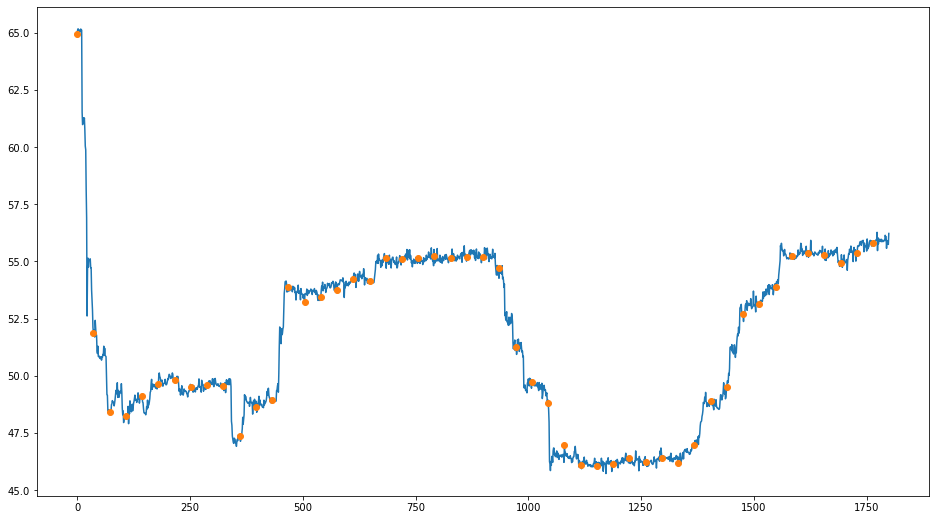

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(subject_097_sp_response[:36*50])
ax.plot([36*i for i in range(0,50)],subject_097_sp_response_downsample[:50],'o')

Clearly downsampling the responses (if it were done at this stage) would benefit from noise reduction.

In [15]:
print(subject_097_sp_response)

[64.96 65.11 65.17 ... 44.37 44.34 44.48]


In [16]:
def plot_4_subject_responses_run1_visit1(participants):
    fig, ax = plt.subplots(2,2, figsize=(16,9))
    for i, ax in enumerate(ax.flatten()):
        ax.plot(load_single_subject_response(subject = participants[i], visit= 1, run= 1, plot = 0, task_type = 'sp', downsample = False))
        ax.set_title(f"{participants[i]}")
        ax.set_xlabel("time")
        ax.set_ylabel("response value")
    plt.suptitle("The responses of 4 participants.")    
    plt.tight_layout()
        

In [17]:
#plot_4_subject_responses_run1_visit1(['sub-099','sub-100','sub-115','sub-120'])

In [18]:
def plot_all_responses_for_all_chronic_subjects():
    """Plots all of the responses for all of the chronic subjects, where these exist, and are of length 8784.
    Responses that are not of this length will not be plotted, so this does not give a good idea of the length of all of the 
    responses - just the ones that are length 8784."""

    for subject in chronic_df['participant_id']:
        responses, key = get_all_responses_for_one_subject(subject,task_type='sp',downsampled=False)
        print(responses.shape)
        font = 20
        cut = 4*36 # remove the first volume
        legend = []
        if len(responses.shape ) == 2:
            fig = plt.figure(figsize=(20,5))
            for i, response in enumerate(responses):
                legend.append(key[i][:6])
                plt.plot(np.linspace(cut/36,610,8784-cut),response[cut:],linestyle='solid')
            plt.xlabel("seconds",fontsize=font)
            plt.xticks(np.arange(0,650,50))
            plt.ylabel("response values",fontsize=font)
            plt.title(f"{subject} responses", fontsize=font)
            plt.legend(legend,fontsize=font-5) 
            plt.show()

#plot_all_responses_for_all_chronic_subjects()

In [19]:
def display_all_responses_filtered(filterFunction):
    """Displays plots of all the responses, underneath their filtered versions."""

    for num in np.arange(100,122):
        
        responses, key = get_all_responses_for_one_subject(f'sub-{num}',task_type='sp',downsampled=False)
        print(responses.shape)
        cut = 4*36 # remove the first volume
        font = 25
        if len(responses.shape ) == 2:
            fig = plt.figure(figsize=(20,5))
            for i, response in enumerate(responses):
                if "run1" in key[i]:
                    spacingVal = 44
                    spacing = np.arange(cut,8784-cut,36*spacingVal)
                    plt.plot(np.arange(cut,8784),response[cut:],linestyle='dotted',label=key[i][:6])
                    plt.plot(np.arange(cut,8784),filterFunction(response[cut:]),linestyle='solid')
            plt.xlabel("seconds",fontsize=font)
            plt.xticks(spacing,np.asarray(spacing*2.5/36,dtype=int),fontsize = font)
            plt.ylabel("Response values",fontsize=font)
            plt.yticks(fontsize=font)
            plt.title(f"Subject {num} responses", fontsize=font)
            plt.legend(fontsize=font/1.5) 
            plt.show()

In [20]:
from scipy.signal import savgol_filter

savgol = lambda signal: savgol_filter(signal,8*36+1,3)

#display_all_responses_filtered(savgol)

# A comparison of different smoothing methods

In [21]:
import scipy
from scipy import signal
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

def gaussian_blur(x, s, normalised = True):
  """Gaussian Blur with standard deviation s"""

  kernel = np.exp(-(1/(2 * s ** 2) * np.arange(-3 * s, 3 * s) ** 2))
  if normalised:
    kernel /= np.sum(kernel)
    return signal.oaconvolve(x, kernel, mode='same')
  else:
    return signal.oaconvolve(x, kernel, mode='same')

def euc_cost (x,y):
  """Returns euclidean distance."""
  return np.sum((x-y)**2)

def return_maximum_second_deriv(x,min=False, plot=True):
  """Returns the maximum second derivative of the signal."""
  if plot:
    fig, ax = plt.subplots(2,1,figsize=(16,4))
    ax.flatten()
    #first = x[1:] - x[:-1]
    first = savgol_filter(x,9,5,1)
    ax[0].plot(first,'x')
    
    second = savgol_filter(x,9,5,2)
    ax[1].plot(second)
    plt.suptitle("The derivatives of the cost function, 1st and 2nd")
    plt.show()
  else:
    second = savgol_filter(x,9,5,2)
  
  if min:
    return np.where(np.min(second) == second)[0][0]
  else:
    return np.where(np.max(second) == second)[0][0]


norm = lambda x : (x-np.mean(x))#/np.std(x)


In [22]:
def optimise_filter_method(filter, paramValues, costFunction, response, min=False, plot=True):
  """Takes a subject "sub-100", filter, filter parameter values as an ndarray, 
  and cost function, and optimises the filter on the response. The cost function
  should take the response and the filtered response as input.
  min is whether to use the minimum or the maximum second derivatie of the cost function."""

  smoothing_costs = np.zeros_like(paramValues)
  i=0
  for param in paramValues:
    smoothing_costs[i] = costFunction(response,filter(response,param))
    #print(f"cost for param {param} is {smoothing_costs[i]}")
    i+=1
  if plot:
    fig = plt.figure(figsize=(10,4))
    plt.plot(paramValues,smoothing_costs,'x')
    plt.title("Smoothed signal cost against parameter Values")
    plt.show()

  maximum_second_deriv = return_maximum_second_deriv(smoothing_costs, min=min,plot=plot)
  print(f"The maximum second derivative was at position {maximum_second_deriv}")

  return paramValues[maximum_second_deriv]

In [23]:

def plot_smoothed_response(response, filters: dict, filterParams: list, cost, START=0, END=8784):
  """Plots a filtered response and calculates the cost of filtering."""
  fig = plt.figure(figsize=(20,4))

  smoothed_responses = []
  i=0
  times = 2.5/36 * np.arange(0,len(response))[START:END]

  for key, filter in filters.items():
    smoothed_response = filter(response, filterParams[i])
    i+=1

    print(f"{key} smoothing cost: {cost(response,smoothed_response)}")

    plt.plot(times,smoothed_response[START:END],label=f'smoothed {key} response')
  plt.plot(times,response[START:END],label='response')
  plt.xlabel("seconds")
  plt.legend()
  plt.show()


In [24]:
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import median_filter
from scipy.ndimage import correlate1d

#gaussian = lambda signal, param: gaussian_blur(signal,param)
gaussian = lambda signal, param: gaussian_filter1d(signal,param,truncate=6)
savitsky_golay = lambda signal, param: savgol_filter(signal, param,7)
median = lambda signal, param: median_filter(signal,param)

def spline(signal, param):
  spl = UnivariateSpline(np.arange(len(signal)),signal,k=4,s=param)
  return spl(np.arange(len(signal)))

def hanning(signal, param: int):
  """Compute a hanning window convolution."""
  weights = np.hanning(param)[::-1]
  return correlate1d(signal, weights/weights.sum(), -1, None, 'reflect', 0, 0)

In [25]:
CUT = 4*36
response = load_single_subject_response('sub-108',1,1,False,'sp',downsample=False)
response = norm(response[CUT:])

loading the data of: 
       group race gender  age origin
107  chronic    4      M   47      1
len of responses:  8784


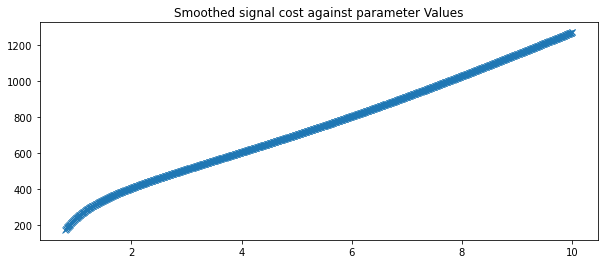

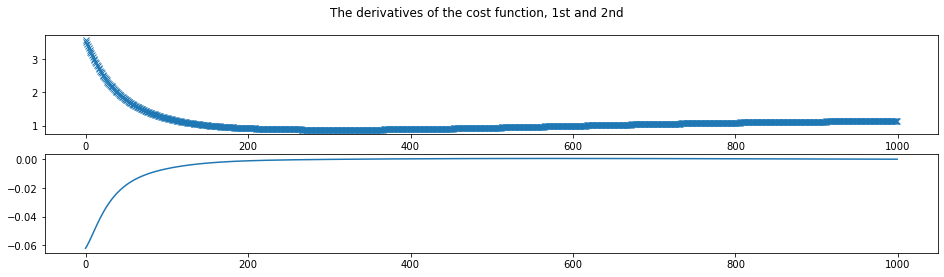

The maximum second derivative was at position 572
best gaussian param is: 6.067667667667667


In [26]:

best_gaussian_param = optimise_filter_method(gaussian,np.linspace(0.8,10,1000),euc_cost,response,plot=True)
print("best gaussian param is:", best_gaussian_param )

In [27]:
best_savitsky_param = optimise_filter_method(gaussian,np.arange(11,8*36+1,2),euc_cost,response,min=True,plot=False)
print("best savitsky param is:", best_savitsky_param )

The maximum second derivative was at position 2
best savitsky param is: 15


In [28]:
# best_spline_param = optimise_filter_method(spline,np.arange(3,20,4),euc_cost,response,min=False,plot=False)
# print("best spline param is:", best_spline_param )

In [29]:
best_med_param = optimise_filter_method(median,np.arange(1,21,1),euc_cost,response,min=False,plot=False)
print("best med param is:", best_med_param )

The maximum second derivative was at position 3
best med param is: 4


In [30]:
best_hanning_param = optimise_filter_method(hanning,np.arange(7,8*36,1),euc_cost,response,min=True,plot=False)
print("best hanning param is:", best_hanning_param )

The maximum second derivative was at position 0
best hanning param is: 7


hanning smoothing cost: 288.5715986111111
gaussian smoothing cost: 809.9979532847115
savgol smoothing cost: 330.3438320050119
spline smoothing cost: 4.002384271201124
med smoothing cost: 460.2231999999999


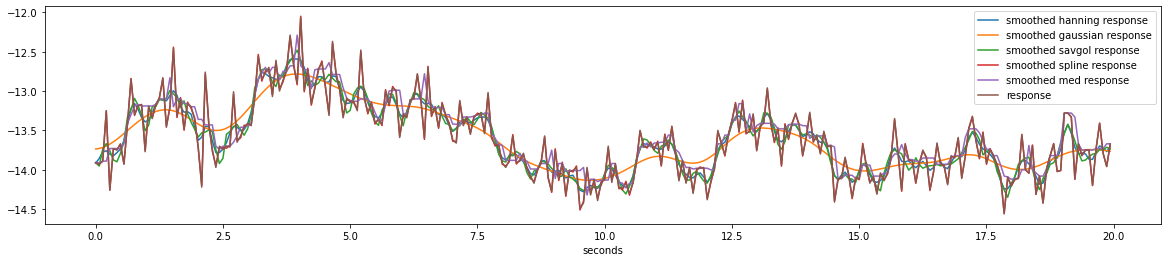

In [31]:
plot_smoothed_response(
  response,
  {"hanning": hanning,"gaussian": gaussian,"savgol": savitsky_golay, "spline": spline,"med": median},
  [best_hanning_param,best_gaussian_param,best_savitsky_param,4,best_med_param],
  euc_cost,int(0*36/2.5),int(20*36/2.5))

This shows that the Savitsky Golay filter has bad behaviour around the large jumps in the signal!

# Computing FFT's for subjects

In [32]:
from scipy.fft import rfft,rfftfreq

def plot_fft_for_subject(subject):
  cut = 4*36
  response = load_single_subject_response(subject,1,1,False,'sp',False,False)[cut:]
  response = response - np.mean(response) # remove the 0 frequency peak
  sample_rate = 14.4
  n = len(response)
  FFT = rfft(response)
  freq = rfftfreq(n, d=1./sample_rate)

  fig, ax = plt.subplots(2,figsize=(20,2))
  ax[0].plot(np.arange(cut,n+cut)*2.5/36,response)
  ax[1].plot(freq,np.absolute(FFT),'x')
  plt.suptitle(f"FFT subject {subject}, run 1 visit 1")
  plt.tight_layout()
  plt.show()

In [33]:
def plot_subject_ffts():
  for subject in chronic_df['participant_id']:
    try:
      plot_fft_for_subject(subject)
    except ValueError:
      print("No data for this subject, visit, and run")

So I should try first to apply a low pass filter to the responses and see if this makes a difference.

In [34]:
from scipy.signal import butter, sosfiltfilt, welch

def low_pass_filter_response(subject,visit, run,response, fs=14.4, plot=True, plot_extra=False):
  """
  Low Pass filters a response.
  ### Parameters:
    subject - the subject to low pass filter
    plot - whether to plot the results of the filtering
  """
  #response = response - np.mean(response) # remove the 0 frequency peak, just in case this hasn't been done already
  n = len(response)
  freq = rfftfreq(n, d=1./fs)
  freqs, psd = welch(response,fs=fs)
  power_percentages = np.cumsum(psd)/np.sum(psd)

  second = savgol_filter(power_percentages,9,4,2)
  cutoff_freq = freqs[np.where(second > 0-0.02)[0][0]]

  if plot_extra:
    plt.semilogy(freqs,power_percentages)
    plt.axvline(cutoff_freq, linestyle='dashed')
    plt.show()

    plt.plot(freqs, second, label='second derivative of power percentages')
    plt.axvline(cutoff_freq, linestyle='dashed')

    plt.show()

  sos = signal.butter(10, cutoff_freq, 'lp', fs=fs, output='sos')
  filtered = signal.sosfiltfilt(sos, response)
  
  if plot_extra:
    times = np.arange(n)*2.5/36
    FFT = rfft(response)

    fig, ax = plt.subplots(3,figsize=(10,6))
    ax[0].plot(times,response)
    ax[1].semilogy(freq,np.absolute(FFT)/np.sum(np.absolute(FFT)),label='PSD')
    ax[1].axvline(cutoff_freq, 0,1,linestyle='dashed',label='cutoff freq')
    ax[1].set_title("normalised PSD")
    ax[1].set_ylabel("Normalised log PSD")
    ax[1].set_xlabel("Hz")
    ax[1].legend()
    ax[0].plot(times,filtered)
    plt.suptitle(f"Butterworth filter subject {subject}, run {run} visit {visit}")
    ax[0].set_xlabel("seconds")
    ax[0].set_ylabel("pain rating")

    ax[2].plot(freqs,power_percentages)
    ax[2].set_title("Cumulative PSD")
    ax[2].set_xlabel("Hz")
    ax[2].set_ylabel("Cumulative PSD")
    ax[2].axvline(cutoff_freq, 0,1,linestyle='dashed',label='cutoff freq')


    plt.tight_layout()
    plt.show()
  elif plot:
    times = np.arange(n)*2.5/36
    FFT = rfft(response)

    fig, ax = plt.subplots(1,figsize=(10,2))
    ax.plot(times,response)
    ax.plot(times,filtered)
    plt.suptitle(f"Butterworth filter subject {subject}, run {run} visit {visit}")
    plt.xlabel("seconds")
    plt.ylabel("pain rating")
    plt.tight_layout()
    plt.show()

  return filtered

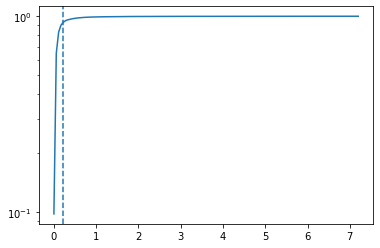

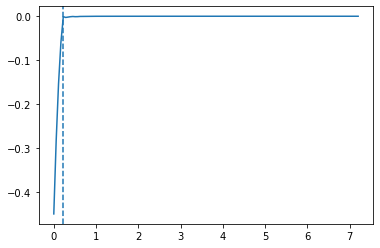

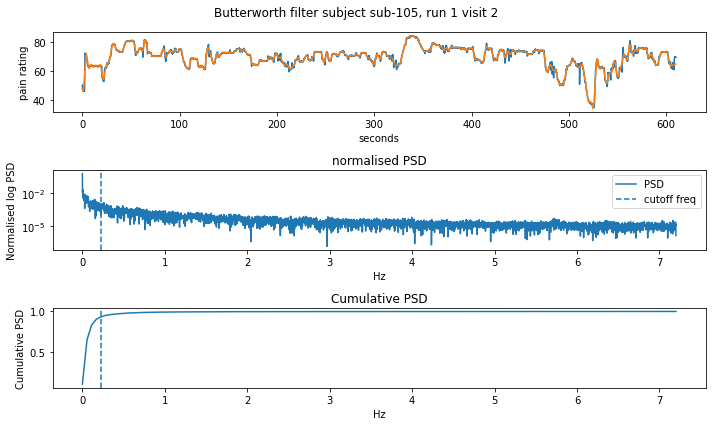

In [35]:
def low_pass_filter_one_subject(subject,visit):
  try:
    response = load_single_subject_response(subject,visit,1,0,'sp',False,False)
    low_pass_filter_response(subject,visit, 1, response, plot_extra = True ,plot=False)
  except Exception as error:
    print(error, "Probably No data for this subject, visit, and run")

low_pass_filter_one_subject('sub-105',2)

In [36]:
def low_pass_filter_all_subjects_run_1_visit_1(verbose = False):
  chronic_and_subacute_df = participants_df.loc[(participants_df["group"] == "chronic") | (participants_df["group"] == "subacute")]
  for subject in chronic_and_subacute_df['participant_id']:
    for visit in [1,2,3,4]:
      try:
        response = load_single_subject_response(subject,visit,1,0,'sp',False,False)
        low_pass_filter_response(subject,visit, 1, response, plot_extra = verbose ,plot=True)
      except Exception as error:
        print(error, "Probably No data for this subject, visit, and run")

In [37]:
#low_pass_filter_all_subjects_run_1_visit_1()

# Saving the filtering

Now that I have a smoothing method that should work for all of the participants, I need to save the responses for both all of the chronic and all of the subacute patients, where the responses exist. The responses that I am saving are the non-downsampled, but smoothed, responses. This means that although I should be able to save them as one file, I may not be able to save them as a clean array that has equal numbers of elements in each column. Also, simply saving as an array would need a key that allows access to all of the responses, so it might be better to save as a dictionary, with a key for each response, something like {"visit1,sp_run_01": smoothed response"}. This is the method that I will first use. Then it will be possible to get responses out by simply accessing the corresponding dictionary entry. 

# Plotting a couple of chronic patients

loading the data of: 
       group race gender  age origin
100  chronic    4      M   47      1
len of responses:  8784
loading the data of: 
       group race gender  age origin
112  chronic    6      F   40      1
len of responses:  8784
loading the data of: 
       group race gender  age origin
115  chronic    6      F   52      1
len of responses:  8784


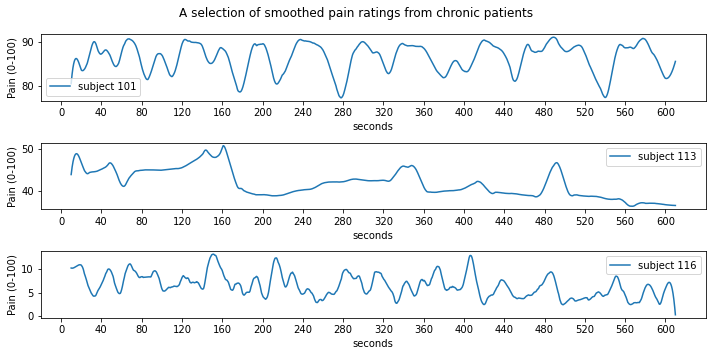

In [38]:
responsePlots = np.zeros((3,8784))
responsePlots[0,:] = (load_single_subject_response(subject = "sub-101", visit= 1, run= 1, plot = 0, task_type = 'sp', downsample = False))
responsePlots[1,:] = (load_single_subject_response(subject = "sub-113", visit= 3, run= 1, plot = 0, task_type = 'sp', downsample = False))
responsePlots[2,:] = (load_single_subject_response(subject = "sub-116", visit= 2, run= 1, plot = 0, task_type = 'sp', downsample = False))


start = 4*36
times = np.arange(start,8784)
i=0
fig, axes = plt.subplots(3,figsize=(10,5),sharey=False)
for ax in axes.flatten():
  ax.plot(times,savgol_filter(responsePlots[i,start:],8*36+1,3), label = f"subject {[101,113,116][i]}")
  #ax.plot(times,responsePlots[i,start:], label = f"subject {[101,113,116][i]}")
  ax.legend()
  spacingVal = 16
  spacing = np.arange(0,8784,36*spacingVal)
  ax.set_xticks(spacing)
  ax.set_xticklabels(np.asarray(spacing*2.5/36,dtype=int))
  ax.set_xlabel("seconds")
  ax.set_ylabel("Pain (0-100)")
  i+=1

plt.suptitle("A selection of smoothed pain ratings from chronic patients")
plt.tight_layout()

The response measurement frequency was $14.40$ Hz, making the total time $610$ seconds

Responses are graded to two decimal places, between 0 and 100. The above graph shows that the longer responses were not simply padded, but contain actual data which will be lost upon downsampling.

Is is important to notice the difference between the frequencies present in the downsampled signal as opposed to the higher frequency reading.

/home/ca541/.conda/envs/sbp_env/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  .format(nperseg, input_length))


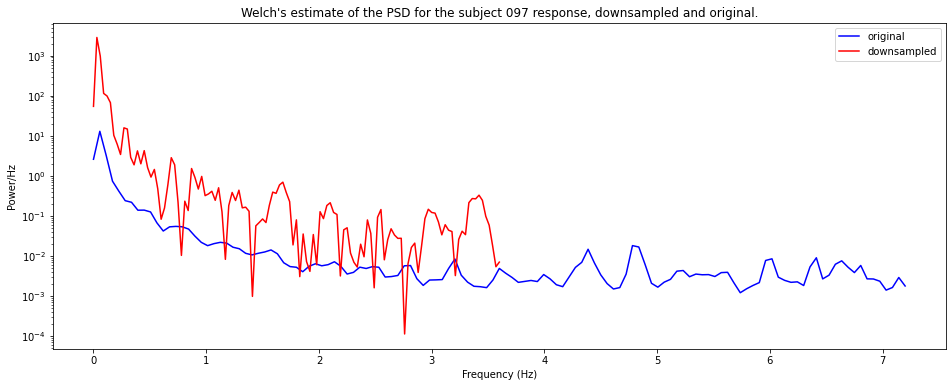

In [39]:
fig, ax = plt.subplots(figsize = (16,6))
f, Pxx_den = welch(subject_097_sp_response[4:], fs= 14.40)
f2, Pxx_den2 = welch(subject_097_sp_response_downsample[4:],fs= 7.2)
plt.semilogy(f,Pxx_den,color = 'blue')
plt.semilogy(f2,Pxx_den2, color= 'red')
plt.title(f"Welch's estimate of the PSD for the subject 097 response, downsampled and original.")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Hz')
plt.legend(['original', 'downsampled'])


## Examining the responses of all chronic pain patients

task-sp_bold.json

"EchoTime": 0.03

 "SliceTiming": [1255, 0, 1322.5, 70, 1392.5, 137.5, 1462.5, 207.5, 1532.5, 277.5, 1602.5, 347.5, 1672.5, 417.5, 1742.5, 487.5, 1812.5, 557.5, 1882.5, 627.5, 1950, 695, 2020, 765, 2090, 835, 2160, 905, 2230, 975, 2300, 1045, 2370, 1115, 2440, 1185]
 "FlipAngle": 80,
 "Instructions": "During this scan please rate your pain using the finger device o na scale from 0 to 100, where 0 is no pain and 100 is the worst pain imaginable. On the screen in front of you you will see a yellow bar which will move with your fingers reflecting your current rating. Please use this to record your pain, including any moment by moment fluctuations."/

We want to know which responses have already been downsampled and which are not, so that the best psd's can be obtained. 

In [40]:
for participant in chronic_df['participant_id']:
    visits = get_all_visits_for_one_subject(participant)
    for visit in visits:
        try:
            response = load_single_subject_response(participant, visit = visit, run = 1, plot = 0, display = 0,downsample= False)
            if(len(response) != 8784):
                print(f"{participant}, visit {visit}, response length {len(response)}")
        except Exception as err:
            print(err)
            continue

resp not available, subject sub-099, visit 2, run 1
resp not available, subject sub-099, visit 3, run 1
resp not available, subject sub-099, visit 4, run 1
resp not available, subject sub-102, visit 1, run 1
resp not available, subject sub-102, visit 2, run 1
resp not available, subject sub-103, visit 2, run 1
resp not available, subject sub-104, visit 2, run 1
resp not available, subject sub-104, visit 3, run 1
resp not available, subject sub-104, visit 4, run 1
sub-107, visit 3, response length 8822
sub-108, visit 2, response length 8779
sub-110, visit 3, response length 16711
resp not available, subject sub-110, visit 4, run 1
sub-112, visit 3, response length 8783
sub-119, visit 1, response length 17568
resp not available, subject sub-121, visit 4, run 1
resp not available, subject sub-122, visit 1, run 1
resp not available, subject sub-122, visit 2, run 1
resp not available, subject sub-122, visit 3, run 1
resp not available, subject sub-122, visit 4, run 1


### Healthy participants were not asked to participate in the sp task, so no data was available for them in this task.

The subacute patients have a wide variety of response lengths.

In [41]:
for participant in subacute_df['participant_id']:
    visits = get_all_visits_for_one_subject(participant)
    for visit in visits:
        try:
            response = load_single_subject_response(participant, visit = visit, run = 1, plot = 0, display = 0,downsample= False)
            if(len(response) != 8784):
                print(f"{participant}, visit {visit}, response length {len(response)}")
        except Exception as err:
            print(err)
            continue

sub-001, visit 1, response length 244
resp not available, subject sub-001, visit 3, run 1
resp not available, subject sub-001, visit 5, run 1
resp not available, subject sub-002, visit 2, run 1
sub-006, visit 4, response length 8780
sub-007, visit 3, response length 8842
resp not available, subject sub-008, visit 5, run 1
resp not available, subject sub-010, visit 5, run 1
sub-011, visit 3, response length 8783
resp not available, subject sub-012, visit 1, run 1
resp not available, subject sub-014, visit 1, run 1
sub-014, visit 3, response length 8780
sub-015, visit 2, response length 8716
sub-017, visit 2, response length 8772
resp not available, subject sub-027, visit 4, run 1
sub-028, visit 4, response length 2196
sub-030, visit 2, response length 8781
sub-031, visit 4, response length 2196
sub-032, visit 3, response length 8781
sub-034, visit 4, response length 8780
sub-036, visit 4, response length 8782
sub-038, visit 3, response length 17568
sub-040, visit 4, response length 8783

This information shows that for all of the chronic patients it is possible to plot spectrograms at a much higher frequency resolution. This will be the aim of the next notebook. It is important to deal with the lengths of the runs correctly, and know whether they are due to a higher sampling rate or simply more samples. 